In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline



In [2]:
Q = 2.4578e6
Te = np.arange(0, Q, 1000)
c = 3e8   #speed of light
Q = 2.4578e6
Z = 54    #atomic number of TPC medium
A = 131   #atomic mass of TPC medium
z = 1     #charge of the particle
re =2.8e-13   #radius of electron in meters
me = 511e3/(c**2)    # mass of electron in eV
M = 938e6/(c**2)     # mass of Proton
M2 = 3.72e9/(c**2)  # mass of alpha
M3 = 105e6/(c**2)   # mass of muon
Na = 6.02e23    # avagrado number mol-1


def N(t):
    return (1/c**5)*(t**2+2*t*me*c**2)**(1/2)*(Q-Te)**2*(Te+me*c**2)

def D(E):
    return E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)

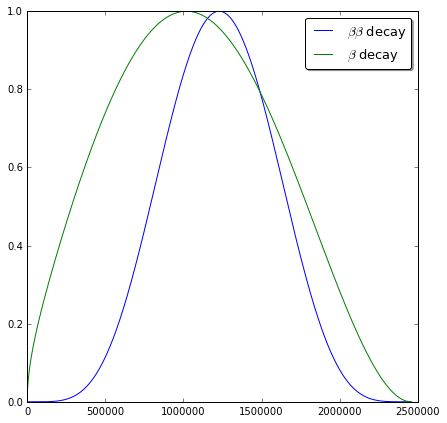

In [3]:
plt.figure(figsize=(7,7))
plt.plot(Te,D(Te)/max(D(Te)),label=r'$\beta \beta$ decay')
plt.plot(Te,N(Te)/max(N(Te)),label=r'$ \beta$ decay')
plt.legend(loc='upper right',fontsize=13,shadow=True, fancybox=True)

#plt.xlim(2.3e6,2.6e6)
plt.show()

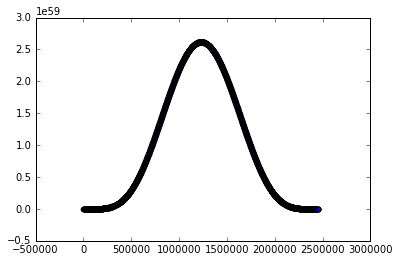

In [4]:
plt.scatter(Te,D(Te))
#plt.xlim(2.3e6,2.6e6)
plt.show()

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))

[]

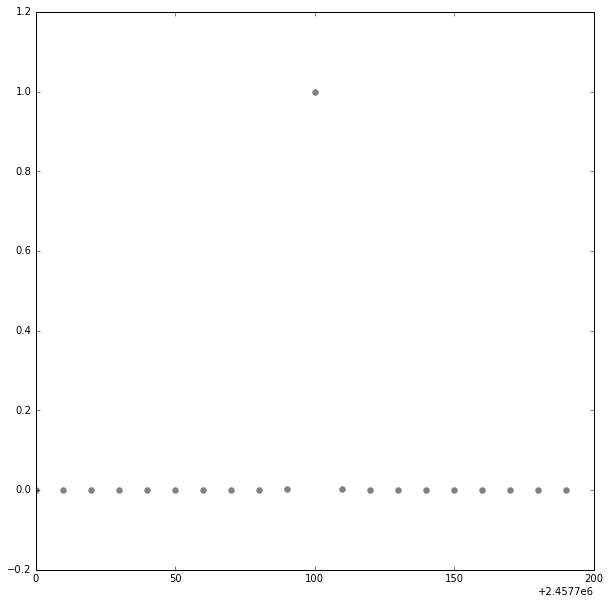

In [6]:
plt.figure(figsize=(10,10))
pure=np.arange(Q-100,Q+100,10)
noise = np.random.normal(0, 0.4, 1722)
#vars = pure + noise

sig = 3
G1 = gaussian(pure,Q,sig)

plt.scatter(pure,G1/max(G1),linewidth=2,color = 'grey')
#plt.tight_layout()
#plt.xlim(450,650)
#plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Argauspc.pdf')
plt.xlim(Q-100,Q+100)

plt.plot()

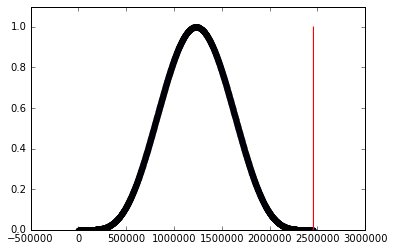

In [7]:
plt.scatter(Te,D(Te)/max(D(Te)),label=r'$\beta \beta$ decay')
plt.plot(pure,G1/max(G1),color = 'r')
plt.ylim(0,1.1)
#plt.xlim(2.3e6,2.6e6)
plt.show()

In [8]:
bbnorm = (D(Te)/907932.6598128964)/max(D(Te))*10**6
area2vbb = bbnorm.sum()*1000
area2vbb

1000000.0

In [9]:
novu = (G1)/10.077318407256719/max(G1)
area0vbb = (novu.sum())*10
area0vbb

0.99999999999999989

In [10]:
# Abb = 10^6 A0vu

In [11]:
sum(bbnorm/max(bbnorm))*110.14

99999.703151792361

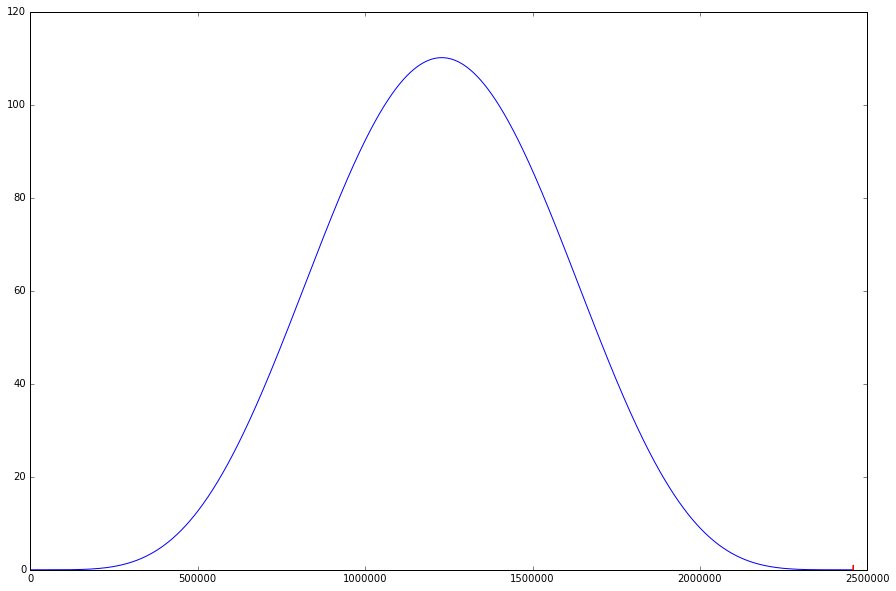

In [12]:
plt.figure(figsize=(15,10))
plt.plot(Te,bbnorm/max(bbnorm)*110.14,label=r'$\beta \beta$ decay')
plt.plot(pure,novu/max(novu),color = 'r')
#plt.ylim(0,1.1)
#plt.xlim(2.3e6,2.6e6)
#plt.xlim(1.5e6,2.6e6)

plt.show()

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


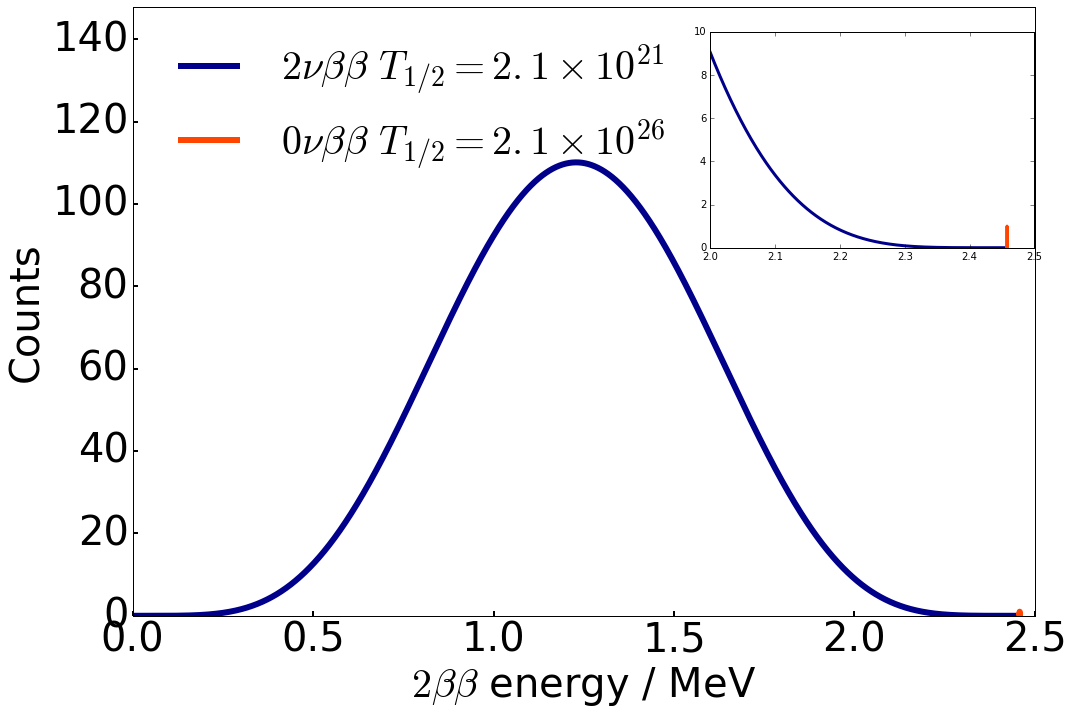

In [30]:
plt.figure(figsize=(15,10))
plt.plot(Te/1e6,bbnorm/max(bbnorm)*110.14,color='darkblue',label=r'$2\nu \beta \beta$ $ T_{1/2}=2.1\times 10^{21}$',linewidth=6)
plt.plot(pure/1e6,novu/max(novu),color = 'orangered',label=r'$0\nu \beta \beta$ $ T_{1/2}=2.1\times 10^{26}$',linewidth=6)
plt.legend(loc='upper left',fontsize=40,shadow=True, frameon=False)


#plt.text(1.85, 0.3, r'Rate normalized by $10^6$', fontsize=30)
plt.xlabel(r'$2\beta\beta$ energy / MeV', fontsize=40)
plt.ylabel('Counts', fontsize=40)
#plt.title('Fluo-4 Barium Induced Fluorescence', fontsize=32)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='in',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)
plt.ylim(0,148)

#plt.xlim(2.3e6,2.6e6)
#plt.xlim(1.8,2.5)
#plt.ylim(0,0.35)

a = plt.axes([.66, .65, .3, .3])
plt.plot(Te/1e6,bbnorm/max(bbnorm)*110.14,color='darkblue',linewidth=3)
plt.plot(pure/1e6,novu/max(novu),color = 'orangered',linewidth=3)
#plt.axhline(y=.35, xmin=.72, xmax=1, linewidth=2, color = 'r')
#plt.axvline(x=1.8, ymin=0, ymax=.29, linewidth=2, color = 'r')
plt.xlim([2,2.5])
plt.ylim(0,10)
#plt.title('Full Spectrum',fontsize = 20)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/theor-spec.pdf')

plt.show()

In [12]:
Totx = np.append(Te,pure)
Toty = np.append(bbnorm,novu)
print('len Te =', len(Te))
print('len pure =', len(pure))
print('len Tot =', len(Totx))

len Te = 2458
len pure = 20
len Tot = 2478


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


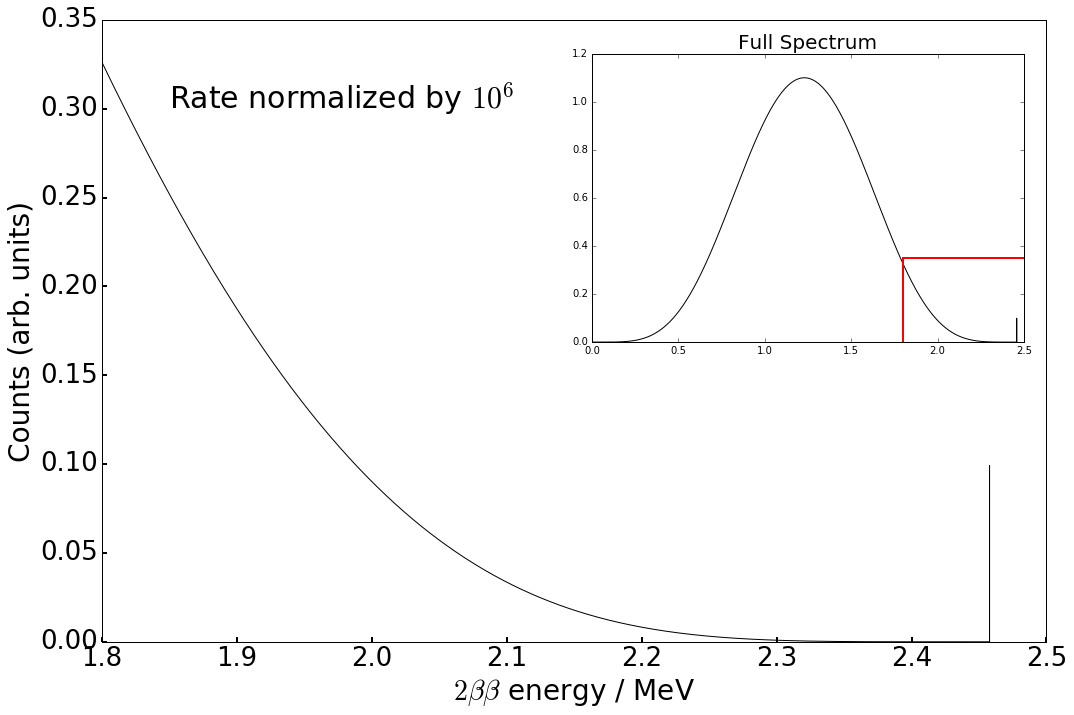

In [13]:
plt.figure(figsize=(15,10))
plt.plot(Totx/1e6,Toty,color='k')

plt.text(1.85, 0.3, r'Rate normalized by $10^6$', fontsize=30)
plt.xlabel(r'$2\beta\beta$ energy / MeV', fontsize=28)
plt.ylabel('Counts (arb. units)', fontsize=28)
#plt.title('Fluo-4 Barium Induced Fluorescence', fontsize=32)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='in',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)



#plt.xlim(2.3e6,2.6e6)
plt.xlim(1.8,2.5)
plt.ylim(0,0.35)

a = plt.axes([.55, .52, .4, .4])
plt.plot(Totx/1e6,Toty,color='k')
plt.axhline(y=.35, xmin=.72, xmax=1, linewidth=2, color = 'r')
plt.axvline(x=1.8, ymin=0, ymax=.29, linewidth=2, color = 'r')
plt.xlim([0,2.5])
plt.title('Full Spectrum',fontsize = 20)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/2nu0nu.pdf')

plt.show()

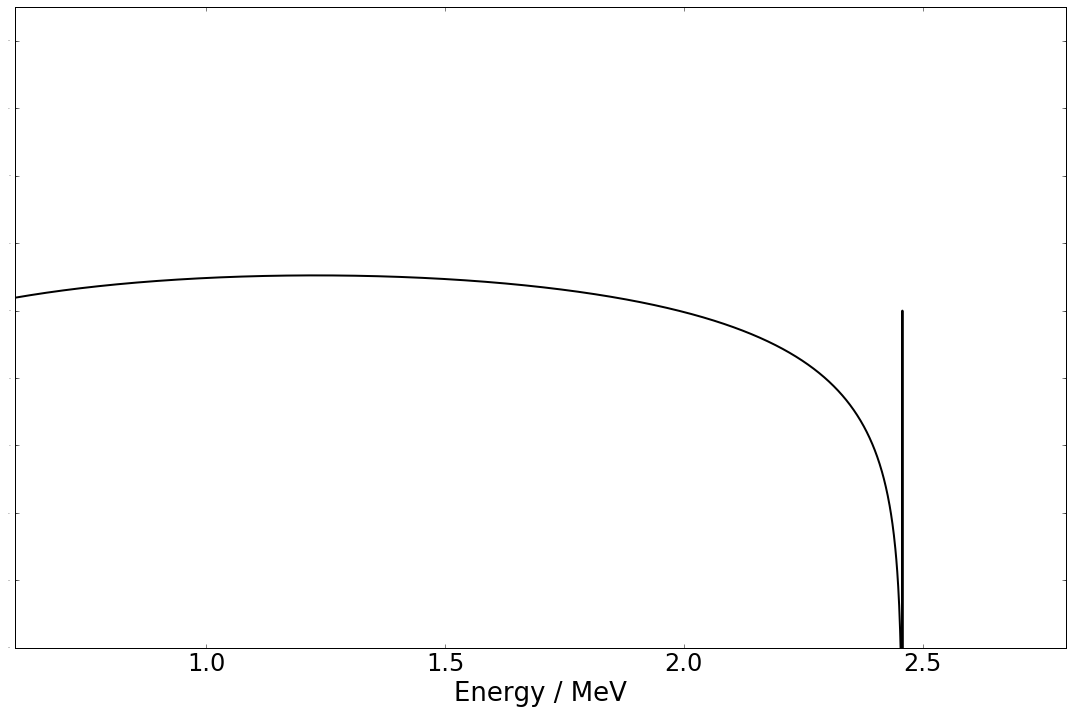

In [38]:
plt.figure(figsize=(15,10))
#plt.plot(Totx/1e6,Toty,color='k')

'''plt.text(1.85, 0.3, r'Rate normalized by $10^6$', fontsize=30)
plt.xlabel(r'$2\beta\beta$ energy / MeV', fontsize=28)
plt.ylabel('Counts (arb. units)', fontsize=28)
#plt.title('Fluo-4 Barium Induced Fluorescence', fontsize=32)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='in',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)



#plt.xlim(2.3e6,2.6e6)
plt.xlim(1.8,2.5)
plt.ylim(0,0.35)

a = plt.axes([.55, .52, .4, .4])'''
plt.semilogy()
plt.plot(Totx/1e6,Toty*1e6,color='k',linewidth=2)
#plt.axhline(y=.35, xmin=.72, xmax=1, linewidth=2, color = 'r')
#plt.axvline(x=1.8, ymin=0, ymax=.29, linewidth=2, color = 'r')
plt.xlim([0.6,2.8])
plt.ylim(1e-5,1e14)
plt.xticks(fontsize=24)
plt.yticks(fontsize=0)
plt.tight_layout()
plt.xlabel("Energy / MeV",fontsize=26)

plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/2nu0nu.pdf')

plt.show()